<a href="https://colab.research.google.com/github/itsmesethus/sparkfoundation-gripoct22-/blob/main/task_6(decision_tree).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **SPARK'S FOUNDATION**

**DATA SCIENCE AND BUSINESS ANALYTICS INTERN**

NAME: SETHU S
BATCH: GRIPOCT22
TASK: 6

**BUILDING DECISION TREE CALSSIFIER USING IRIS DATASET**



***IMPORTING REQUIRED LIBRIRIES***

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:

d=pd.read_csv("/content/Iris.csv")
d

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [30]:
df=d.drop(columns="Id")       #here i have dropped the Id column from the dataset
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [31]:
df.shape      # it shows  there are 150 rows and 6 columns in the dataset

(150, 5)

In [32]:
df.info()    # it shows about the information about the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [33]:
df.dtypes    # here it shows about the datatypes of the column present in the dataset.

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [34]:
df.describe()   # it shows about the numerical measures about the individual columns in the data set.

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7882e0c410>,
      dtype=object)

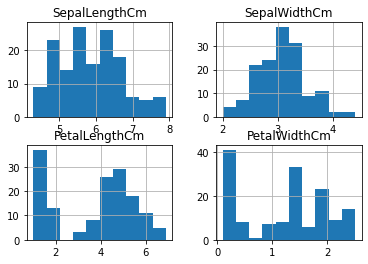

In [42]:
df.hist()

**DATA PREPROCESSING**

In [46]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
le=LabelEncoder()       #Label Encoding: It considers an order for encoding.
mm=MinMaxScaler()


x=df.iloc[:,1:-1]   # splitting the independent variables columns for calssification
y=df.iloc[:,-1]     # splitting the dependent variable  column for classification


y=le.fit_transform(y)    #conversion y using LabelEncoder using fit_transform
x=mm.fit_transform(x[x.columns])   # conversion of x using MinMaxScaler for the except species column.

**MODEL BULDING**


In [86]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)
print("data splitting is completed")

data splitting is completed


In [87]:
from sklearn.tree import DecisionTreeClassifier
tc=DecisionTreeClassifier()
tc.fit(x_train,y_train)
print("Model taining is complete")

Model taining is complete


In [88]:
y_pred=tc.predict(x_test)
y_pred

array([0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 1, 2, 2,
       1, 0, 1, 0, 0, 2, 0, 1])

**PERFORMANCE METRICS FOR THE DECISION TREE CLASSIFIER  MODEL**

In [89]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,accuracy_score,f1_score

c=confusion_matrix(y_test,y_pred)
ps=precision_score(y_test,y_pred,average="weighted")
rcall=recall_score(y_test,y_pred,average="weighted")
a=accuracy_score(y_test,y_pred)
f=f1_score(y_test,y_pred,average="weighted")

print(f"confusion matrix : {c}")
print(f"precision score : {ps}")
print(f"recall score: {rcall}")
print(f"accuracy score : {a}")
print(f"f1 score: {f}")


confusion matrix : [[ 8  0  0]
 [ 0 12  0]
 [ 0  0 10]]
precision score : 1.0
recall score: 1.0
accuracy score : 1.0
f1 score: 1.0


**DATA VISUALIZATION**

In [90]:
from sklearn.tree import plot_tree

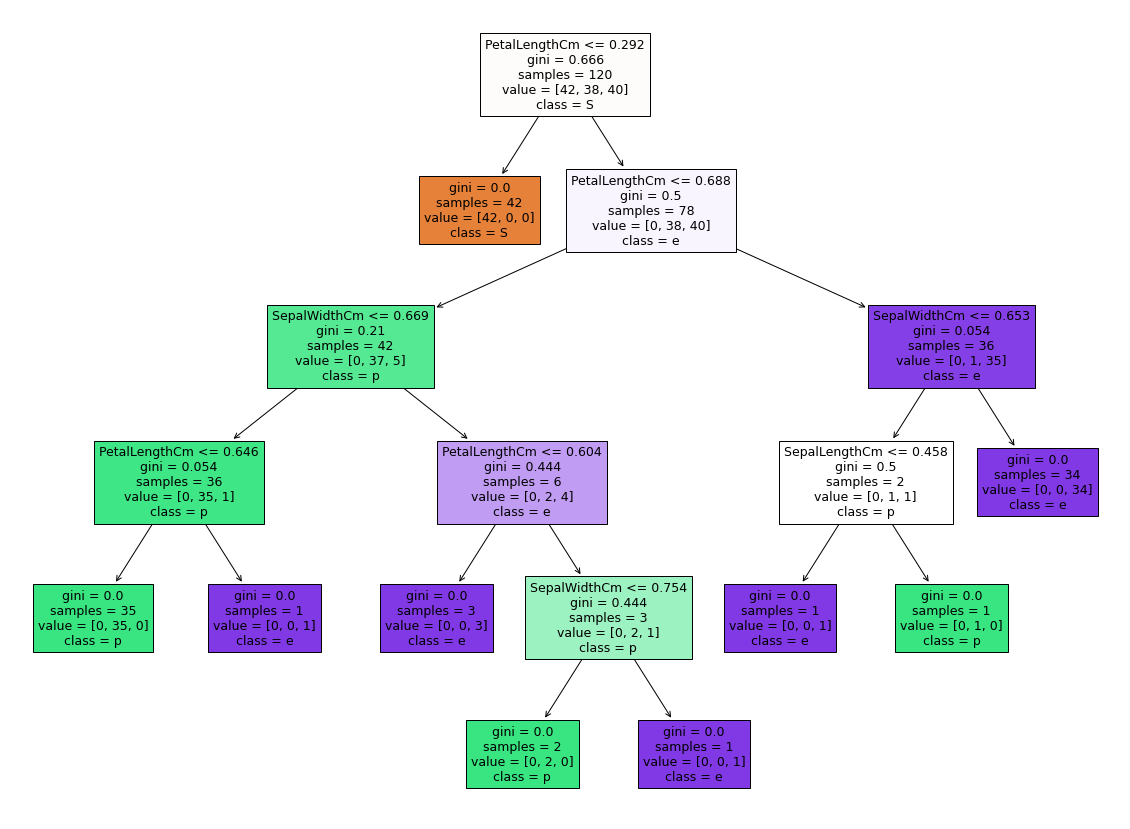

In [94]:
plt.figure(figsize=(20,15))
plot_tree(tc,feature_names=df.columns[:-1],class_names=df.columns[-1],filled=True)
plt.show()